# Single AI crypto concept

In [1]:
from xdata_config import *

## 1 - Imports and fonctions

In [2]:
from functions_module import *

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (
2023-01-03 01:30:51.045432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-03 01:30:51.045499: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-03 01:30:51.120318: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-03 01:30:52.574011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: N

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense 
from keras.models import load_model

In [4]:
# chking import
MetaData

,0,Pair,launch_week_stamp,launch_day_stamp,launch_minute
0,SNMBUSD,SNM/BUSD,1661126400000,1661472000000,2022-08-26 08:00:00
1,BTCUSDT,BTC/USDT,1502668800000,1502928000000,2017-08-17 04:00:00
2,LUNAUSDT,LUNA/USDT,1597622400000,1597968000000,2020-08-21 10:00:00
3,ETHUSDT,ETH/USDT,1502668800000,1502928000000,2017-08-17 04:00:00
4,GMTUSDT,GMT/USDT,1646611200000,1646784000000,2022-03-09 12:00:00
...,...,...,...,...,...
107,FIDAUSDT,FIDA/USDT,1632700800000,1632960000000,2021-09-30 12:00:00
108,XNOUSDT,XNO/USDT,1642982400000,1643328000000,2022-01-28 08:00:00
109,BTGUSDT,BTG/USDT,1618185600000,1618531200000,2021-04-16 07:00:00
110,GHSTUSDT,GHST/USDT,1629072000000,1629417600000,2021-08-20 10:00:00


In [5]:
if BUY_MODE=="BUY_ONLY":
    buy_function=buy_up_only
elif BUY_MODE=="BUY_UP":
    buy_function=buy_up
elif  BUY_MODE=="BUY_DIP":
    buy_function=buy_min_up
elif  BUY_MODE=="AFTER_DEPTH":
    buy_function=buy_after_depth
elif  BUY_MODE=="BUY_UP_CLOSE":
    buy_function=buy_up_close

try:
    os.mkdir(DATA_DIR, mode = 0o777)
except Exception as e:
    print(e)
print(f"Results dir: {DATA_DIR}")


def One_pair_AI_Gen(pair="ETH/USDT",row_numbers=500000):
    ResJS={}
    mfile=f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model_v{VERSION}.hdf5'
    nfile=f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Norm_v{VERSION}.json'
    print(f"One_pair_AI_Gen : {pair}")
    price_volatility_15m=round((100*(df_list15m[pair]["high"]-df_list15m[pair]["low"])/df_list15m[pair]["high"]).mean()*0.51,2)
    print(f"price_volatility_15m:{price_volatility_15m}%")
    df=mini_expand4(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,BUY_PCT=max(price_volatility_15m,BUY_PCT),SELL_PCT=SELL_PCT,buy_function=buy_function)
    print("df original shape "+str(df.shape))
    print(f"df original shape buy mean : {df.buy.mean()*100}")
    df=df.reset_index()
    try:df.pop("num_index")
    except: pass
    try:df.pop("index")
    except: pass
    try:df.pop("date")
    except: pass
    df=data_shufler(df)            
    #df=data_chooser(df,weight=50,row_numbers=df.buy.sum()*2)
    df=data_chooser50(df,row_numbers=row_numbers)
    gc.collect()
    df=data_cleanup(df)
    df=df.dropna()
    print("df choosen data shape"+str(df.shape))
    print(f"pair: {(df.shape[0]/2)==df.buy.sum()}")
    dt=df.to_numpy(dtype=np.float32)
    #dt=df.to_numpy()
    dt=np.nan_to_num(dt,nan=0)
    #dt=dt.astype(np.float32)
    dt=np.nan_to_num(dt, neginf=0) 
    dt=np.nan_to_num(dt, posinf=0) 

    ## normalisation
    index_20pct= int(0.2*len(dt[:,0]))
    print(index_20pct)
    if True:
        if True:
        #if True:
            print("normalizing ...")
            mean = dt[index_20pct:, 0:-1].mean(axis=0)
            std = dt[index_20pct:, 0:-1].std(axis=0)



            dt[index_20pct:, 0:-1] -= mean 
            dt[index_20pct:, 0:-1] /= std

            dt[:index_20pct, :-1] -=mean
            dt[:index_20pct, :-1] /= std
            FIRST_NORM_FLAG=False
            ######################### SAVIN NORM ################
            try:
                Normalization={"mean":mean.tolist(),"std":std.tolist()}
                with open(nfile, 'w+') as fp:
                            json.dump(Normalization, fp,  indent=4)
                            print(fp.name)
            except Exception as e:
                print("error Normalization in juppiter")
                print(e)
        else:print("already normalized")
        
    dt=np.nan_to_num(dt,nan=0)
    dt=np.nan_to_num(dt, neginf=0) 
    dt=np.nan_to_num(dt, posinf=0) 
    dt=dt.astype(np.float32)
    ## Model
    IN_DIM=dt.shape[1]-1
    model = Sequential()
    model.add(Dense(int(250),input_dim=IN_DIM,activation='relu')) #( 100=>66.23)
    # resultus withe 250 d0.3 50 d 20 d 8 = 65.6% vs  65.49 no droppout vs 65.78 d0.5 vs 65.68 d0.4 # 65.48 # one dropout of   0.5 = 66.11   #tanh 66.33 accuracy #softmax 66.12 #softplus 66.5 # sigmoid 66.21 / 
    model.add(Dropout(0.2))
    model.add(Dense(int(20),activation='relu')) # best softplus 66.26(69) vs relu 66.65(70)  / -20 => 66.25 /250 ->65.78
    #model2.add(Dropout(0.1)) #5=> 66.00  66.21 vs no dopout 66.28
    #model2.add(Dense(int(20),activation='relu')) # disabled 6.24
    model.add(Dense(int(50),activation='relu')) # -4 -> -> 66.24
    model.add(Dense(1,activation='sigmoid'))
    print(model.summary())
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    callbacks_a = ModelCheckpoint(filepath =mfile,monitor ='val_accuracy',save_best_only = True, save_weights = True)
    callbacks_b = EarlyStopping(monitor ='val_accuracy',mode='auto',patience=15,verbose=1)
    print("saving file in: "+mfile)
    history = model.fit(dt[index_20pct:, 0:-1],
                    dt[index_20pct:,-1],
                    validation_data=(dt[:index_20pct, :-1],dt[:index_20pct,-1]),
                    epochs=6000,
                    batch_size=256*10,
                    callbacks=[callbacks_a,callbacks_b])

    print('##########################################################################')
    print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
    print(nfile)
    print(mfile)
    ResJS[pair]='{0:.4g}'.format(max(history.history['val_accuracy'])*100)
    return( model , ResJS)
    #94%
    
def NormalDataTest(pair="ETH/USDT"):
    price_volatility_15m=round((100*(df_list15m[pair]["high"]-df_list15m[pair]["low"])/df_list15m[pair]["high"]).mean()*0.51,2)
    print(f"price_volatility_15m:{price_volatility_15m}%")
    df=mini_expand4(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,BUY_PCT=max(price_volatility_15m,BUY_PCT),SELL_PCT=SELL_PCT,buy_function=buy_function)
    print("df original shape "+str(df.shape))
    print(f"df original shape buy mean : {df.buy.mean()*100}")
    df=df.reset_index()
    try:df.pop("num_index")
    except: pass
    try:df.pop("index")
    except: pass
    try:df.pop("date")
    except: pass
    # df=data_shufler(df)            
    # #df=data_chooser(df,weight=50,row_numbers=df.buy.sum()*2)
    # df=data_chooser50(df,row_numbers=500000)
    # gc.collect()
    df=data_cleanup(df)
    df=df.dropna()
    print("df choosen data shape"+str(df.shape))
    print(f"pair: {(df.shape[0]/2)==df.buy.sum()}")
    dt=df.to_numpy(dtype=np.float32)
    #dt=df.to_numpy()
    dt=np.nan_to_num(dt,nan=0)
    #dt=dt.astype(np.float32)
    dt=np.nan_to_num(dt, neginf=0) 
    dt=np.nan_to_num(dt, posinf=0) 

    ## normalisation
    #index_20pct= int(0.2*len(dt[:,0]))
    #print(index_20pct)
    Y=dt[:,-1].copy()
    dt[:,:-1]=normalize(dt[:,:-1],f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Norm_v{VERSION}.json')
    dt=np.nan_to_num(dt,nan=0)
    dt=np.nan_to_num(dt, neginf=0) 
    dt=np.nan_to_num(dt, posinf=0) 
    dt=dt.astype(np.float32)
    ## Model
    return dt
    #94%

Results dir: /UltimeTradingBot/Data/BUY_UP_CLOSE


In [6]:
pair="SNM/BUSD"
mfile=f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model_v{VERSION}.hdf5'
nfile=f'{DATA_DIR}/{pair.replace("/", "-")}-tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Norm_v{VERSION}.json'
print(mfile)
print(nfile)

/UltimeTradingBot/Data/BUY_UP_CLOSE/SNM-BUSD-tp50_w40_max10min_Model_v1.hdf5
/UltimeTradingBot/Data/BUY_UP_CLOSE/SNM-BUSD-tp50_w40_max10min_Norm_v1.json


In [8]:
!ls /UltimeTradingBot/Data/BUY_UP_CLOSE/SNM-BUSD_*

zsh:1: no matches found: /UltimeTradingBot/Data/BUY_UP_CLOSE/SNM-BUSD_*


In [9]:
model,h=One_pair_AI_Gen(pair)

One_pair_AI_Gen : SNM/BUSD
price_volatility_15m:0.93%
mini_expand : SNM/BUSD
---buy_simple_up--- Buy pct: 0.93%
---buy_only--- Max time window: 10%
---buy_only--- no b
---buy_only--- no sell
df original shape (107970, 1607)
df original shape buy mean : 10.713161063258312
df choosen data shape(107970, 1607)
pair: True
21594
normalizing ...
/UltimeTradingBot/Data/BUY_UP_CLOSE/SNM-BUSD-tp50_w40_max10min_Norm_v1.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               401750    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                5020      
                                                                 
 dense_2 (Dense)             (None,

2023-01-03 01:41:00.413059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-03 01:41:00.413113: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-03 01:41:00.413151: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: abj-K93SV
2023-01-03 01:41:00.413167: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: abj-K93SV
2023-01-03 01:41:00.413246: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-01-03 01:41:00.413310: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 390.154.0


None
saving file in: /UltimeTradingBot/Data/BUY_UP_CLOSE/SNM-BUSD-tp50_w40_max10min_Model_v1.hdf5
Epoch 1/6000
34/34 [==============================] - 6s 134ms/step - loss: 0.5715 - accuracy: 0.7093 - val_loss: 0.5125 - val_accuracy: 0.7522
Epoch 2/6000
34/34 [==============================] - 4s 110ms/step - loss: 0.5006 - accuracy: 0.7610 - val_loss: 0.4654 - val_accuracy: 0.7857
Epoch 3/6000
34/34 [==============================] - 4s 110ms/step - loss: 0.4566 - accuracy: 0.7875 - val_loss: 0.4185 - val_accuracy: 0.8168
Epoch 4/6000
34/34 [==============================] - 4s 109ms/step - loss: 0.4125 - accuracy: 0.8155 - val_loss: 0.3745 - val_accuracy: 0.8357
Epoch 5/6000
34/34 [==============================] - 4s 110ms/step - loss: 0.3717 - accuracy: 0.8385 - val_loss: 0.3432 - val_accuracy: 0.8604
Epoch 6/6000
34/34 [==============================] - 4s 117ms/step - loss: 0.3401 - accuracy: 0.8556 - val_loss: 0.3038 - val_accuracy: 0.8783
Epoch 7/6000
34/34 [==================

## 2- Garbage Test

In [12]:
pair="SNM/BUSD"
model = load_model(mfile)

2023-01-02 23:25:20.769018: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-02 23:25:20.769361: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-02 23:25:20.769410: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: abj-K93SV
2023-01-02 23:25:20.769428: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: abj-K93SV
2023-01-02 23:25:20.769512: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-01-02 23:25:20.769584: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 390.154.0


In [10]:
pair="SNM/BUSD"
price_volatility_15m=(100*(df_list15m[pair]["high"]-df_list15m[pair]["low"])/df_list15m[pair]["high"]).mean()*0.51
print(price_volatility_15m)

0.9285710853217788


In [11]:
df=mini_expand4(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,BUY_PCT=max(price_volatility_15m,BUY_PCT),SELL_PCT=SELL_PCT,buy_function=buy_function)


mini_expand : SNM/BUSD
---buy_simple_up--- Buy pct: 0.9285710853217788%
---buy_only--- Max time window: 10%
---buy_only--- no b
---buy_only--- no sell


In [12]:
print("df choosen data shape"+str(df.shape))
(df.shape[0]/2)==df.buy.sum()

df choosen data shape(107970, 1607)


False

In [13]:
df

,price,high-1,low-1,close-1,volume-1,high-2,low-2,close-2,volume-2,high-3,...,BTC_volume-39_5min,BTC_high-40_5min,BTC_low-40_5min,BTC_close-40_5min,BTC_volume-40_5min,day,hour,minute,lunch_day,buy
date,,,,,,,,,,,,,,,,,,,,,
2022-10-05 00:00:00,0.313900,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,93.0,-0.000637,...,2543.10993,-0.001519,0.001382,0.000594,1163.51882,3,0,0,-968,0
2022-10-05 00:01:00,0.313900,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,2543.10993,-0.001527,0.001373,0.000585,1163.51882,3,0,1,-968,0
2022-10-05 00:02:00,0.314325,0.001352,0.001352,0.001352,0.0,0.001352,0.001352,0.001352,0.0,0.001352,...,2543.10993,-0.001002,0.001896,0.001109,1163.51882,3,0,2,-968,0
2022-10-05 00:03:00,0.314600,0.000000,0.002225,0.000000,6768.0,0.002225,0.002225,0.002225,0.0,0.002225,...,2543.10993,-0.001003,0.001896,0.001108,1163.51882,3,0,3,-968,0
2022-10-05 00:04:00,0.314475,-0.000397,-0.000397,-0.000397,0.0,-0.000397,0.001828,-0.000397,6768.0,0.001828,...,2543.10993,-0.001499,0.001401,0.000613,1163.51882,3,0,4,-968,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-18 23:25:00,0.556500,0.004133,0.008625,0.004133,6351.0,0.004492,0.010961,0.006469,17734.0,0.010961,...,194.98097,0.001761,0.002117,0.002028,256.23527,7,23,25,-968,0
2022-12-18 23:26:00,0.558675,0.000134,0.007652,0.000134,11174.0,0.008010,0.012485,0.008010,6351.0,0.008368,...,194.98097,0.001862,0.002218,0.002129,256.23527,7,23,26,-968,0
2022-12-18 23:27:00,0.558375,-0.002552,0.002463,-0.001657,17904.0,-0.000403,0.007119,-0.000403,11174.0,0.007477,...,194.98097,0.001863,0.002219,0.002130,256.23527,7,23,27,-968,0


In [14]:
dt=df.to_numpy(dtype=np.float32)
#dt=df.to_numpy()
dt=np.nan_to_num(dt,nan=0)
#dt=dt.astype(np.float32)
dt=np.nan_to_num(dt, neginf=0) 
dt=np.nan_to_num(dt, posinf=0) 

In [15]:
dt.shape

(107970, 1607)

## 3- Tests and evaluations

In [22]:
dt=NormalDataTest(pair="GMT/USDT")


2.173600867703185
---buy_min_up--- Buy pct: 1.304160520621911%
---buy_only--- no b
df original shape (58441, 1207)
df original shape buy mean : 0.8196300542427405
df choosen data shape(58441, 1207)
pair: False


In [16]:
pair

'SNM/BUSD'

In [17]:
df.iloc[-1,-1]

0

In [20]:
dt_unnormal[-1,-1]

0.0

In [19]:
gc.collect()
dt_unnormal=dt.copy()
Y=dt_unnormal[:,-1]
dt=normalize(dt[:,0:-1],nfile)

In [21]:
X=np.nan_to_num(dt, neginf=0) 
X=np.nan_to_num(dt, posinf=0) 

In [22]:
model.evaluate(X,Y)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

3375/3375 [==============================] - 13s 4ms/step - loss: 0.1080 - accuracy: 0.9705


[0.10804276913404465, 0.9705288410186768]

In [23]:
index_20pct= int(0.2*len(dt[:,0]))
print(index_20pct)


26202


In [ ]:
buy_function=buy_min_up
df=mini_expand3(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,BUY_PCT=BUY_PCT,SELL_PCT=SELL_PCT)
print("df original shape "+str(df.shape))
print(f"df original shape buy mean : {df.buy.mean()*100}")
df=df.reset_index()
try:df.pop("num_index")
except: pass
try:df.pop("index")
except: pass
try:df.pop("date")
except: pass


In [ ]:
pair

In [ ]:
df

In [ ]:
df.index[100]

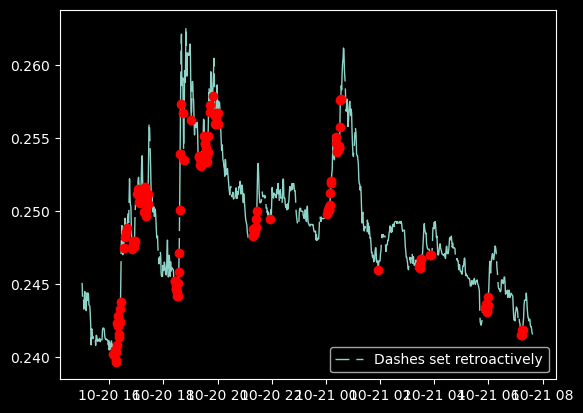

In [23]:
import matplotlib.pyplot as plt

i_start=22500
i_end=i_start+1000
x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(df.index[i_start:i_end], df.price[i_start:i_end], '-', linewidth=1,
                 label='Dashes set retroactively')
line1.set_dashes(dashes)
plt.plot(df[i_start:i_end][df.buy[i_start:i_end]==1].index, df[i_start:i_end][df.buy[i_start:i_end]==1].price, 'ro')


ax.legend(loc='lower right')
plt.show()

In [55]:
df.buy[df.buy==0].sum()

0

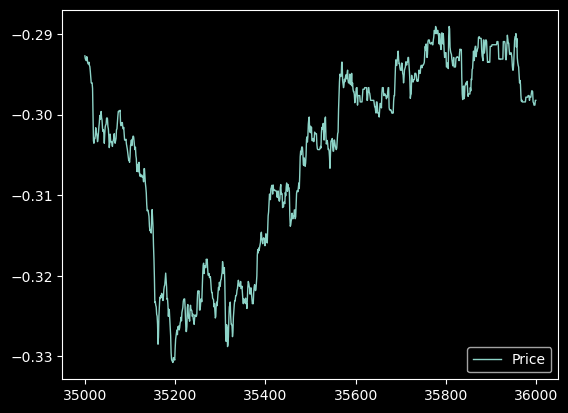

In [53]:
import matplotlib.pyplot as plt

i_start=35000
i_end=i_start+1000
x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(np.arange(i_start,i_end), dt[i_start:i_end,0], '-', linewidth=1,
                 label='Price')
# line1.set_dashes(dashes)
plt.plot(np.arange(i_start,i_end)[dt[i_start:i_end,-1]==1], dt[i_start:i_end,0][dt[i_start:i_end,-1]==1], 'ro')


ax.legend(loc='lower right')
plt.show()

In [31]:
index_20pct=dt.shape[0]

In [32]:

XVALIDATION= dt[:index_20pct, :-1]
YVALIDATION= dt[:index_20pct,-1]
XTRAIN= dt[index_20pct:, 0:-1]
YTRAIN= dt[index_20pct:,-1]


XX0=XVALIDATION[YVALIDATION==0]
YY0=YVALIDATION[YVALIDATION==0]

INDEX_SEP=int(XX0.shape[0]/4)
XX0Train=XX0[INDEX_SEP:]
YY0Train=YY0[INDEX_SEP:]

XX0Val=XX0[:INDEX_SEP]
YY0Val=YY0[:INDEX_SEP]

XX1=XVALIDATION[YVALIDATION==1]
YY1=YVALIDATION[YVALIDATION==1]

INDEX_SEP=int(XX1.shape[0]/4)
XX1Train=XX1[INDEX_SEP:]
YY1Train=YY1[INDEX_SEP:]

XX1Val=XX1[:INDEX_SEP]
YY1Val=YY1[:INDEX_SEP]


accuracy0 = model.evaluate(XX0, YY0)
accuracy1 = model.evaluate(XX1, YY1)
accuracy = model.evaluate(XVALIDATION, YVALIDATION)
maxaccuracy = model.evaluate(dt[:,:-1], dt[:,-1])

print(f"class 0: {format(accuracy0[1]*100,'0.2f')} %")
print(f"class 1: {format(accuracy1[1]*100,'0.2f')} %")
print(f"FULL class : {format(accuracy[1]*100,'0.2f')} %")
print(f"FULL class with all data: {format(maxaccuracy[1]*100,'0.2f')} %")

#accuracy = model.evaluate(dt[:,0:-1], dt[:,-1])


1827/1827 [==============================] - 6s 3ms/step - loss: inf - accuracy: 0.9918
class 0: 100.00 %
class 1: 0.00 %
FULL class : 99.18 %
FULL class with all data: 99.18 %


In [ ]:
# dftest=mini_expand3(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,BUY_PCT=0.4,SELL_PCT=SELL_PCT)
dftest=df
print("df original shape "+str(dftest.shape))
print(f"df original shape buy mean : {dftest.buy.mean()*100}")
dftest=dftest.reset_index()
try:dftest.pop("num_index")
except: pass
try:dftest.pop("index")
except: pass
try:dftest.pop("date")
except: pass
dftest=data_shufler(dftest)            
gc.collect()
dftest=data_cleanup(dftest)
dftest=dftest.dropna()
df.pop("price");print("we work with no price")
df.pop("BTC_price")

In [ ]:
dftest.buy.mean()

In [35]:
#dtt=dftest.to_numpy(dtype=np.float32)
dtt=dt
#dt=df.to_numpy()
dtt=np.nan_to_num(dtt,nan=0)
#dt=dt.astype(np.float32)
dtt=np.nan_to_num(dtt, neginf=0) 
dtt=np.nan_to_num(dtt, posinf=0) 

### stats plus

In [36]:
prediction2=(model.predict( dtt[:, 0:-1])).round()

1827/1827 [==============================] - 7s 4ms/step


In [37]:
ixx=dtt.shape[0]

In [38]:
False_prediction=dtt[:ixx,-1][(prediction2[:ixx].transpose()[0]!=dtt[:ixx])]
True_prediction=dtt[:ixx,-1][(prediction2[:ixx].transpose()[0]==dtt[:ixx])]

In [45]:
dtt[:,-1].mean()*100

0.8196300826966763

In [44]:
fp0=False_prediction[False_prediction==0].shape[0]*100/ixx #### it mean that 11.73 of the 0 class are wrong the buyed witch lead the losses
print( f"Prediction mean :{prediction2.mean()*100} %"+'#### the colose to 50 the better')
print( f"False prediction class 0 :{fp0} %"+'#### it mean that x of the 0 class are wrong the buyed witch lead the losses')
fp1=False_prediction[False_prediction==1].shape[0]*100/ixx   #### we don't buy x % of the correct chanses
print( f"False prediction class 1 :{fp1} %"+'#### we don\'t buy x % of the correct chanses')
trp0=True_prediction[True_prediction==0].shape[0]*100/ixx   #### it mean that 40 % of class 0 are predicted correctly
trp1=True_prediction[True_prediction==1].shape[0]*100/ixx     #### the only buying correct of all
print( f"True prediction class 0 :{trp0} %"+'#### it mean that 40 % of class 0 are predicted correctly')
print( f"True prediction class 1 :{trp1} %"+'#### the only buying correct of all')
print(f"successful buy pct of unsuccessfull: {100*trp1/(trp1+fp1)}  %")


Prediction mean :0.0 %#### the colose to 50 the better
False prediction class 0 :99.18036994575726 %#### it mean that x of the 0 class are wrong the buyed witch lead the losses
False prediction class 1 :0.8196300542427405 %#### we don't buy x % of the correct chanses
True prediction class 0 :0.0 %#### it mean that 40 % of class 0 are predicted correctly
True prediction class 1 :0.0 %#### the only buying correct of all
successful buy pct of unsuccessfull: 0.0  %


In [42]:
Y=dtt[:,-1]

In [43]:
model.evaluate(dt[:index_20pct,:-1], Y[:index_20pct]) #3-> 66.76 / 4 -> 65.75


1827/1827 [==============================] - 8s 4ms/step - loss: inf - accuracy: 0.9918


[inf, 0.9918037056922913]